# Exercícios - Cap 03

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from math import *
from IPython.display import Image
from IPython.core.display import HTML 
plt.style.use('ggplot')

np.random.seed(1)

In [2]:
N = 16
unknows = N-1
x = np.linspace(0, 1, endpoint=True, num=N+1)

## Exercício 01

In [3]:
Image(url= "cap03/ex01.png")

i) O índice correspondente $j^\prime$ em $\Omega^{2h}$ ao índice $j$ em  $\Omega^{2h}$ pode ser encontrado pelo valor de x.

$$ x = \frac{j}{n} = \frac{j^\prime}{n/2} \rightarrow j = 2j^{\prime}$$


ii)
Definindo $k^{\prime} = n - k$, ($ 0 < k^\prime < \frac{n}{2}$)

$$ w^{k}_{j} = sen(\frac{k\pi j}{n})  = sen(\frac{(n-k^\prime)\pi 2j^\prime}{n})$$

$$ w^{k}_{j} =  sen(\frac{2 \pi j^\prime n}{n} - \frac{2 \pi k^\prime j^\prime}{n}) = sen(2 \pi j^\prime - \frac{2 \pi k^\prime j^\prime}{n}) = - \frac{2 \pi k^\prime j^\prime}{n}$$

$$ w^{k}_{j} = - \frac{2 \pi k^\prime j^\prime}{n}$$

$$ w^{k}_{j} = - \frac{\pi k^\prime j^\prime}{n/2} = -_{2h}w^k_{j^\prime}$$

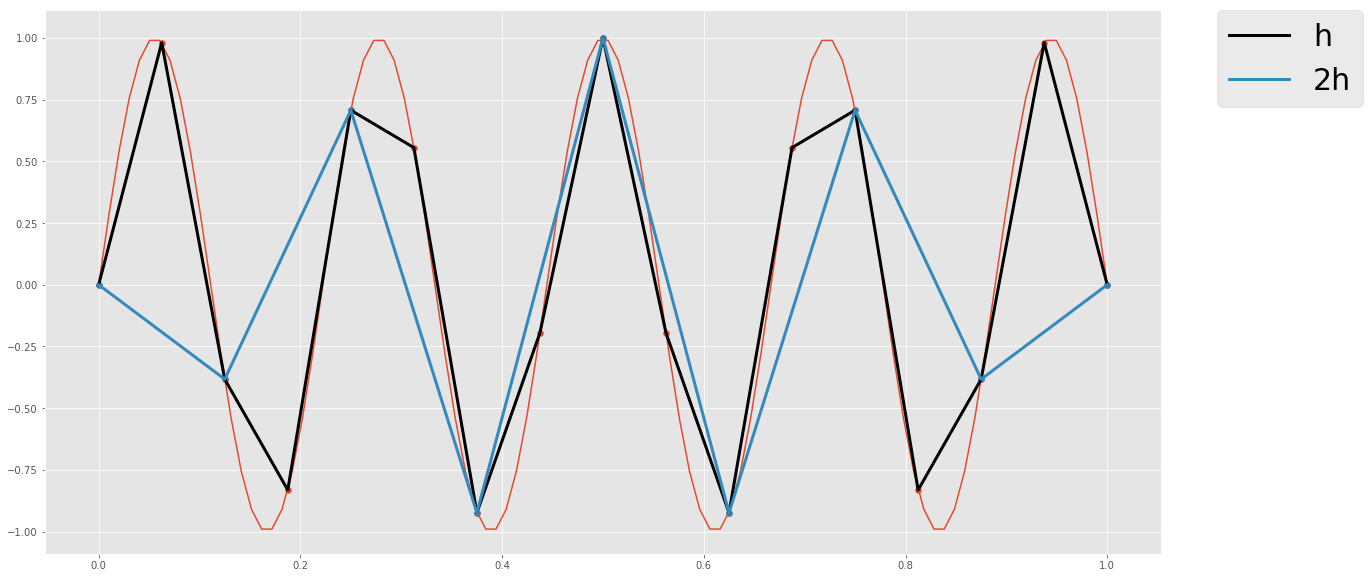

In [4]:
x = np.linspace(0, 1, endpoint=True, num=100)
xh = np.linspace(0, 1, endpoint=True, num=N+1)
x2h = np.linspace(0, 1, endpoint=True, num=N/2+1)
k = 9
klinha = N-k

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x, np.sin(k*np.pi*x))

ax.plot(xh, np.sin(k*np.pi*xh), label="h", c="k", lw=3)
ax.scatter(xh, np.sin(k*np.pi*xh))

ax.plot(x2h, -np.sin(klinha*np.pi*x2h), label="2h", lw=3)
ax.scatter(x2h, -np.sin(klinha*np.pi*x2h))

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=30)

In [5]:
Image(url= "cap03/ex02.png")

A equação $ v \leftarrow v + B^{-1}(f-Av) $ pode ser escrita em função do erro subtraindo da solução original dos dois lados.

$$e_{i+1} = e_{i} - B^{-1}r_i$$

a)

Sendo $u^*$ a solução ótima de $Au=f$.

$$ e_0 = u^* - v_0 $$

$$ r_0 = f - Av_0 $$

b) 

Para evitar confusão, vamos trocar a varíavel de $e$ para $w$. Assim, o problema fica $Aw=r_0$ com condição inicial $w_0$=0.

$$ e^\prime_0 = w^* - w_0 = w^* = A^{-1}(f - Av_0) $$

$$ e^\prime_0 = A^{-1}f - v_0  = u^* - v_0$$

$$ r^\prime_0 =  r_0 - Aw_0 = r_0$$

c)

Como o erro inicial e o resíduo inicial são os mesmos, a equação $e_{i+1} = e_{i} - B^{-1}r_i$ implica que os métodos são equivalentes.

In [6]:
Image(url= "cap03/ex03.png")

Para mostrar que é full-rank vamos olhar para o núcleo desse operador.

$$ I^h_{2h} v^{2h} =  0 \rightarrow v_j^h = 0$$

Mas para os índices pares:

$$ v^{h}_{2j} = 0 \rightarrow v^{2h}_j = 0$$

Assim, $v^{2h}_j = 0$ o que implica que o espaço nulo tem dimensão zero e, portanto, o operador é full rank.


Para o caso 2d, o argumento é semelhante já que $ v_{2i,2j}^h = v_{i,j}^{2h} $

In [7]:
Image(url= "cap03/ex04.png")

a) 
Para o operador de restrição full weighting.
$$
I_h^{2h}= \frac{1}{4}
\left.\begin{matrix}
\overbrace{
\begin{bmatrix}
1 & 2 & 1 & 0 & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 1 & 2 & 1 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 0 & 0 & 1 & 2 & 1 & ... & 0 & 0 & 0\\ 
\vdots && &   &   &   &   &        & \vdots   \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 & 2 & 1
\end{bmatrix} 
}^\text{n-1}
\end{matrix}\right\} (\frac{n}{2}-1)
$$

Definindo 

$$ A(n-1) = 
\left.\begin{matrix}
\overbrace{
\begin{bmatrix}
1 & 2 & 1 & 0 & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 1 & 2 & 1 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 0 & 0 & 1 & 2 & 1 & ... & 0 & 0 & 0\\ 
\vdots && &   &   &   &   &        & \vdots   \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 & 2 & 1
\end{bmatrix} 
}^\text{n-1}
\end{matrix}\right\} (\frac{n}{2}-1)
$$

$A_{n-1}$ tem o mesmo rank que $I_h^{2h}$. E que eliminando os elementos da primeira linha com a primeira coluna, montamos a seguinte matriz com o mesmo rank.

$$ 
\left.\begin{matrix}
\overbrace{
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & {\color{Red} 1} & {\color{Red}2} & {\color{Red}1} & {\color{Red}0 }& {\color{Red}0} & ... & {\color{Red}0} & {\color{Red}0} & {\color{Red}0}\\ 
0 & 0 & {\color{Red} 0} & {\color{Red}0} & {\color{Red}1} & {\color{Red}2}& {\color{Red}1} & ... & {\color{Red}0} & {\color{Red}0} & {\color{Red}0}\\ 
\vdots && &   &   &   &   &        & \vdots   \\ 
0 & 0 & {\color{Red} 0} & {\color{Red}0} & {\color{Red}0} & {\color{Red}0 }& {\color{Red}0} & ... & {\color{Red}1} & {\color{Red}2} & {\color{Red}1}\\ 
\end{bmatrix} 
}^\text{n-1}
\end{matrix}\right\} (\frac{n}{2}-1)
$$

Note que marcado em vermelho temos $A_{n-3}$. Assim, 

$$rank(A_{n-1}) = rank(A_{n-3}) + 1$$

$$rank(A_{n-1}) = rank(A_{n-5}) + 2$$

$$rank(A_{n-1}) = rank(A_{n-2i-1}) + i$$

Portanto, para $i=\frac{n}{2} - 2$

$$ n-2i-1 = n-2(\frac{n}{2} - 2)-1  = 3$$

$$ rank(A_{n-1}) = \frac{n}{2} - 2+ rank(A_3)$$

Como $A_3 = [1 \:2 \:1] \rightarrow rank(A_3)= 1$


$$ rank(A_{n-1}) = \frac{n}{2} - 1 $$


b) 
Para a injeção, basta ver que as colunas de $I_h^{2h}$ não nulas formam base trivial do $\mathbb{R}^{\frac{n}{2}-1} $
$$
I_h^{2h}= 
\left.\begin{matrix}
\overbrace{
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & ... & 0 & 0 & 0\\ 
0 & 0 & 0 & 0 & 0 & 1 & 0 & ... & 0 & 0 & 0\\ 
\vdots && &   &   &   &   &        & \vdots   \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 & 1 & 0
\end{bmatrix} 
}^\text{n-1}
\end{matrix}\right\} (\frac{n}{2}-1)
$$

In [8]:
Image(url= "cap03/ex05.png")

Pela questão anterior e teorema do núcleo e da imagem.

$$ N(I_h^{2h}) + rank(I_h^{2h}) = n - 1  $$

$$ N(I_h^{2h})  = n - 1  - (\frac{n}{2}-1) = \frac{n}{2} $$



In [9]:
Image(url= "cap03/ex06.png")

In [10]:
Image(url= "cap03/ex07.png")

In [11]:
Image(url= "cap03/ex08.png")

In [12]:
Image(url= "cap03/ex08_fig.jpeg")

Os ciclos a mais em relação ao ciclo V(n) tem tamanho n/2, n/4, n/8, ., 2 marcados em preto. E uma subida de tamanho n marcada em vermelho que é metade de um ciclo V(n).

Somando todos os custos, temos:

$$ \text{custo adicional} = 2k + 4k + 8k + ... + k\frac{n}{2} + \frac{k}{2} n $$

Multiplicando por 2,

$$ 2\text{custo adicional} = 4k + 8k + 16k + ... + k\frac{n}{2} + kn + kn $$

Subtraindo uma da outra temos

$$ \text{custo adicional} = kn + kn -  frac{k}{2} n - 2k$$


$$ \text{custo adicional} = k(\frac{3n}{2} - 2)$$
